<a href="https://colab.research.google.com/github/varunbommagunta/ImageProcessing/blob/main/HoughTransform/HoughTransform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from skimage.transform import hough_line, hough_line_peaks
from google.colab.patches import cv2_imshow
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
image = cv2.imread('/content/intersecting-lines.jpg',0)  #Read the image in Gray

In [3]:
image = ~image #Actually the image has white bg,invert that so that we can clearly see the lines (Think of them as edges)

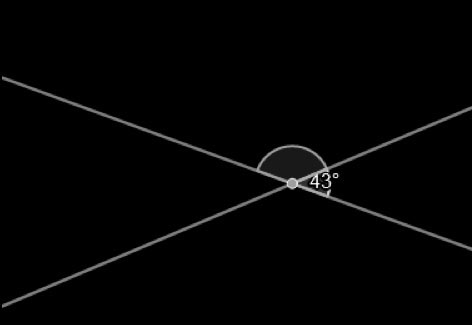

In [4]:
cv2_imshow(image)

In [5]:
tested_angles = np.linspace(-np.pi/2,np.pi/2,180) #Create the parameter space for angles from -90 degrees to 90 degrees with step_size = 1

In [6]:
hspace,theta,dist = hough_line(image,tested_angles) #Transforms the lines to hough space

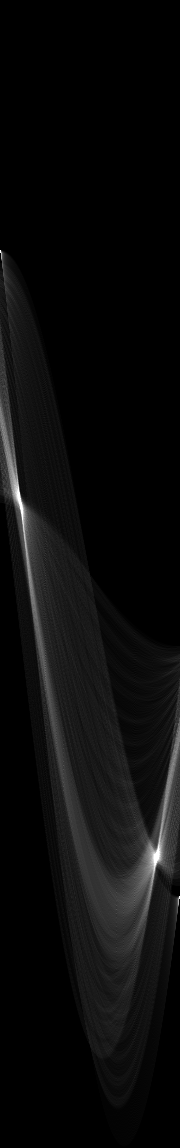

In [7]:
cv2_imshow(hspace)

In [8]:
h,q,d = hough_line_peaks(hspace,theta,dist)

In [9]:
angle_list = []

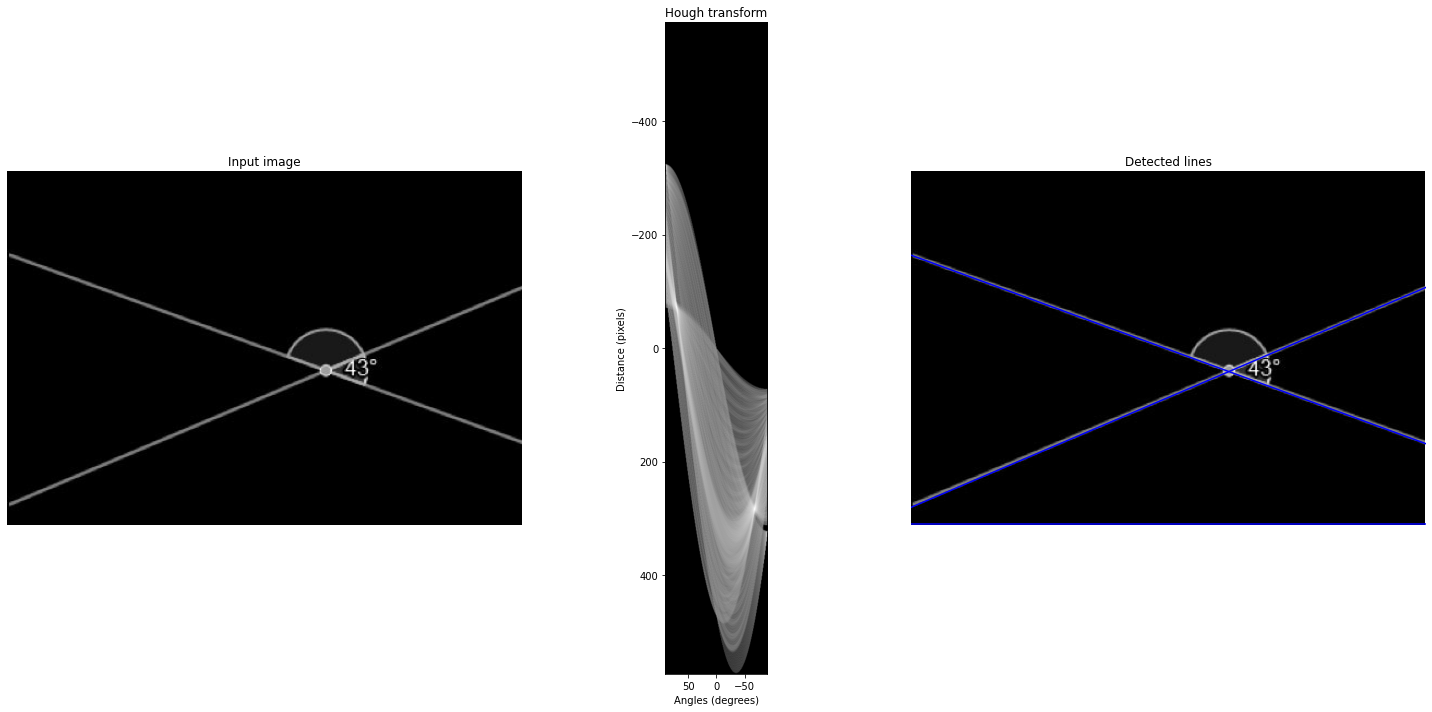

20.1117318435754


In [10]:
fig,axes = plt.subplots(1,3,figsize = (20,10))
ax = axes.ravel()
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

origin = np.array((0, image.shape[1]))

for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), 'b')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

###############################################################
# Convert angles from radians to degrees (1 rad = 180/pi degrees)
angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines

## **The detected lines are clearly Marked in Blue color**